# 健診データによる肝疾患判定

##### 健康診断（血液検査）のデータを使って、肝疾患の有無を判定するモデルを構築。

- データ概要
- 課題種別：分類
- データ種別：多変量
- 学習データサンプル数：891
- 説明変数の数：10
- 欠損値：有り

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.layers import Dense, Activation
from tensorflow import keras

In [88]:
train = pd.read_csv('train.csv')

In [89]:
enc = LabelEncoder()
train['Gender'] = enc.fit_transform(train[['Gender']])

C:\Users\busin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [90]:
train = train.fillna(train['AG_ratio'].mean())
train.isnull().sum()

id          0
Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
disease     0
dtype: int64

In [91]:
sc = MinMaxScaler()
X_train = sc.fit_transform(train[['Age', 'T_Bil', 'D_Bil', 'ALP', 'ALT_GPT', 'AST_GOT', 'TP', 'Alb', 'AG_ratio','Gender']])
Y_train = train['disease']

In [92]:
print(X_train.shape)
print(Y_train.shape)

(891, 10)
(891,)


In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

In [94]:
units = 32

model = keras.Sequential()
model.add(Dense(units, activation='relu', input_shape=(10,)))
model.add(Dense(units, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                352       
                                                                 
 dense_19 (Dense)            (None, 32)                1056      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [96]:
%%time

log = model.fit(X_train, Y_train, epochs=5000, batch_size=32, verbose=True,
          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0, patience=100, verbose=1)],
          validation_data=(X_valid, Y_valid))

Epoch 1/5000
14/14 [==============================] - 1s 25ms/step - loss: 0.6903 - accuracy: 0.5092 - val_loss: 0.6811 - val_accuracy: 0.5615
Epoch 2/5000
14/14 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.6399 - val_loss: 0.6707 - val_accuracy: 0.7380
Epoch 3/5000
14/14 [==============================] - 0s 5ms/step - loss: 0.6671 - accuracy: 0.6881 - val_loss: 0.6609 - val_accuracy: 0.7326
Epoch 4/5000
14/14 [==============================] - 0s 5ms/step - loss: 0.6561 - accuracy: 0.7179 - val_loss: 0.6504 - val_accuracy: 0.7112
Epoch 5/5000
14/14 [==============================] - 0s 5ms/step - loss: 0.6454 - accuracy: 0.6927 - val_loss: 0.6385 - val_accuracy: 0.7273
Epoch 6/5000
14/14 [==============================] - 0s 5ms/step - loss: 0.6316 - accuracy: 0.7110 - val_loss: 0.6252 - val_accuracy: 0.7219
Epoch 7/5000
14/14 [==============================] - 0s 5ms/step - loss: 0.6182 - accuracy: 0.7156 - val_loss: 0.6121 - val_accuracy: 0.7487
Epoch

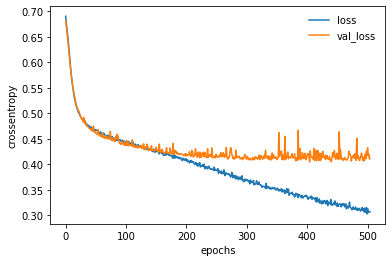

In [97]:
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")
plt.show()


In [98]:
Y_pred = model.predict(X_test)
Y_pred_cls = (Y_pred > 0.5).astype("int32")
Y_pred_ = Y_pred_cls.reshape(-1)
print(classification_report(Y_test, Y_pred_))

9/9 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.72      0.86      0.78       131
           1       0.84      0.67      0.74       137

    accuracy                           0.76       268
   macro avg       0.78      0.77      0.76       268
weighted avg       0.78      0.76      0.76       268

